# Database Normalisation

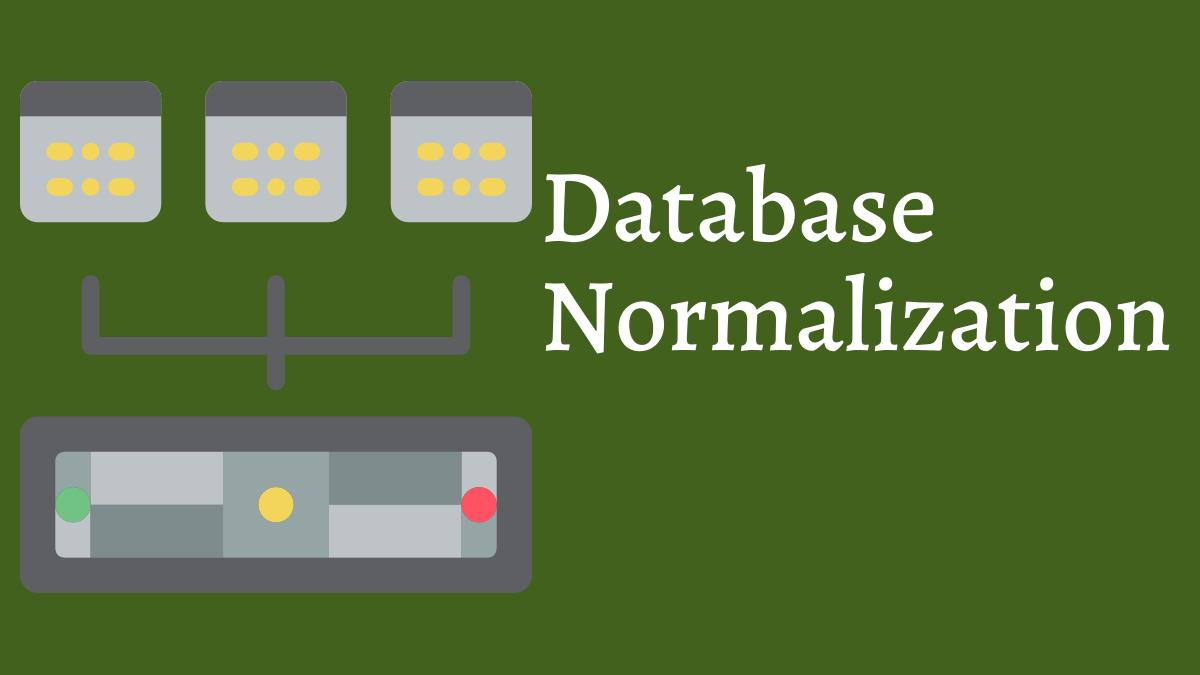

# Lecture Housekeeping



- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

# Learning Objectives

1. Understanding Database Normalization
2. Learn when and how to apply each normal forms(1NF,2NF,3NF)
3. Understand Dependency Diagrams and how to use them to identify data dependencies

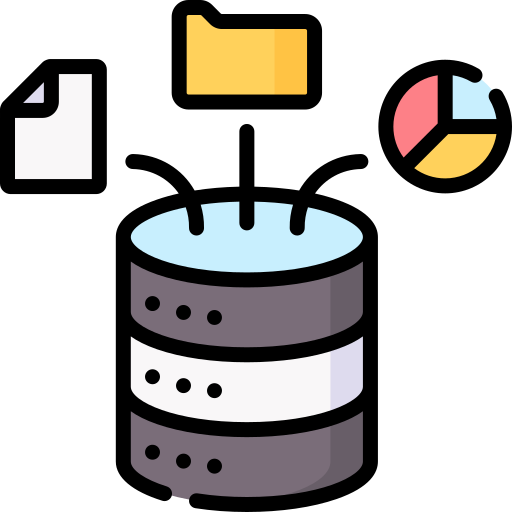

## What is Normalization

Database normalization is a process of organizing a database to minimize redundancy and improve data integrity.

The main goals of database normalization are to:

1. **Eliminate Data Redundancy**: Redundancy can lead to inconsistencies and anomalies in the data. Normalization removes redundant data by organizing it into separate tables.

2. **Ensure Data Integrity**: Normalization helps maintain data accuracy and consistency by preventing update anomalies, insert anomalies, and delete anomalies.

3. **Enhance Query Performance**: Properly normalized databases are often more efficient for retrieving and manipulating data.



## Database anomalies

Database anomalies are irregularities or problems that can occur in a database when it is not properly designed or organized. These anomalies can lead to data inconsistencies, errors, or inefficiencies in the database management process.

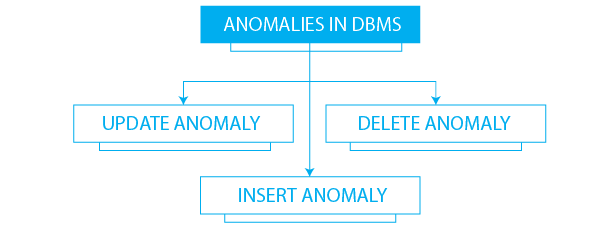

1. **Insertion Anomaly**: occurs when you cannot insert new data into a database because the data is not yet available. For example, you cannot insert a new order into a database until the customer has provided a shipping address.


2. **Deletion Anomaly** : occurs when you delete data from a database and other related data is also deleted, even though it is still needed.For example, if you delete a customer from a database, you may also delete all of their orders, even though those orders may still be needed for accounting purposes.


3. **Update anomaly**: occurs when you update data in a database and other related data is not updated, even though it needs to be.For example, if you update the customer's address in a database, you may not update the shipping address on all of their orders.


## Normal Forms

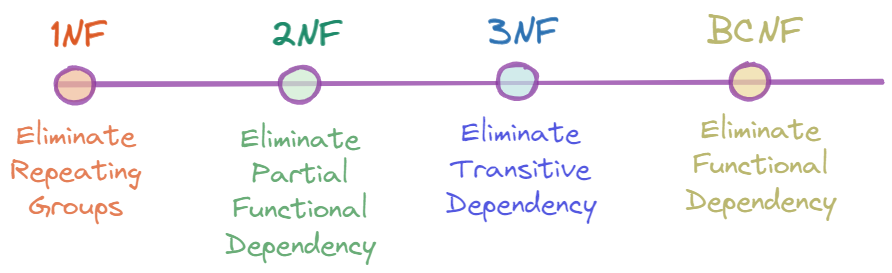

Normal forms are rules and guidelines used to structure a relational database in an organized and efficient way. These rules help minimize data redundancy and ensure data integrity. 

In [7]:
## Types of database normalization

## First Normal Form (1NF)

A database is in 1NF if all of its attributes are atomic, meaning that they cannot be subdivided into smaller parts. 


- a single cell must not hold more than one value (atomicity)
- there must be a primary key for identification
- no duplicated rows or columns
- each column must have only one value for each row in the table

| Customer ID | Name     | Address         | Phone        |
|-------------|------    |----------       |-------       |
| 1           | John Doe | 123 Main Street | 555-555-5555 |

This table is not in 1NF because the Name attribute is not atomic. It should be split into three attributes: First Name, Last Name, and Middle Name.

### Normalized Version:

| Customer ID | First Name | Last Name | Middle Name | Address | Phone |
|-------------|------------|------------|-------------|----------|-------|
| 1           | John       | Doe         |             | 123 Main Street | 555-555-5555 |

## Second Normal Form (2NF)

A database is in 2NF if all of its non-key attributes are fully dependent on the primary key. This means that each non-key attribute must be dependent on the primary key, and not on any other non-key attribute.

A table is said to be in 2NF if it meets the following criteria:

- it’s already in 1NF
- has no partial dependency. That is, all non-key attributes are fully dependent on a primary key.




| Employee ID | Name | Job Code | Job State Code | Home State |
|---|---|---|---|---|
| E001 | Alice | J01 | 26 | Michigan |
| E001 | Alice | J02 | 26 | Michigan |
| E002 | Bob | J02 | 56 | Wyoming |
| E002 | Bob | J03 | 56 | Wyoming |
| E003 | Alice | J01 | 56 | Wyoming |

If you only know someone's employee_id, then you can determine their name, home_state, and state_code (because they should be the same person). This means name, home_state, and state_code are dependent on employee_id (a part of primary composite key). So, the table is not in 2NF. We should separate them to a different table to make it 2NF.

To normalize this table to 2NF, we can split it into tables:

### Employess Roles Table:

| EMPLOYEE_ID | JOB_CODE |
|---|---|
| E001 | J01 |
| E001 | J02 |
| E002 | J02 |
| E002 | J03 |
| E003 | J01 |

This table is in 2NF because the `JOB_CODE` attribute is fully dependent on the primary key (`EMPLOYEE_ID`). 



### Employees Table

| EMPLOYEE_ID | NAME | STATE_CODE | HOME_STATE |
|---|---|---|---|
| E001 | Alice | 26 | Michigan |
| E002 | Bob | 56 | Wyoming |
| E003 | Alice | 56 | Wyoming |

This table is in 2NF because the `STATE_CODE` attribute is fully dependent on the primary key (`EMPLOYEE_ID`). In other words, each employee can only have one state code.



### Jobs Table

| JOB_CODE | JOB |
|---|---|
| J01 | Chef |
| J02 | Waiter |
| J03 | Bartender |



 ### Employess Table
table is not in 3NF because the HOME_STATE attribute is partially dependent on the STATE_CODE attribute. For example, if we know an employee's STATE_CODE and their HOME_STATE is Michigan, we can also determine that their EMPLOYEE_ID is E001.

## Third Normal Form (3NF)

### Employess Table

| EMPLOYEE_ID | NAME | STATE_CODE |
|---|---|---|
| E001 | Alice | 26 |
| E002 | Bob | 56 |
| E003 | Alice | 56 |

### States table

| HOME_STATE_CODE | HOME_STATE |
|---|---|
| 26 | Michigan |
| 56 | Wyoming |

Now, the `HOME_STATE` attribute is fully dependent on the primary key (`HOME_STATE_CODE`) and there are no transitive dependencies.

